# Data Dictionary


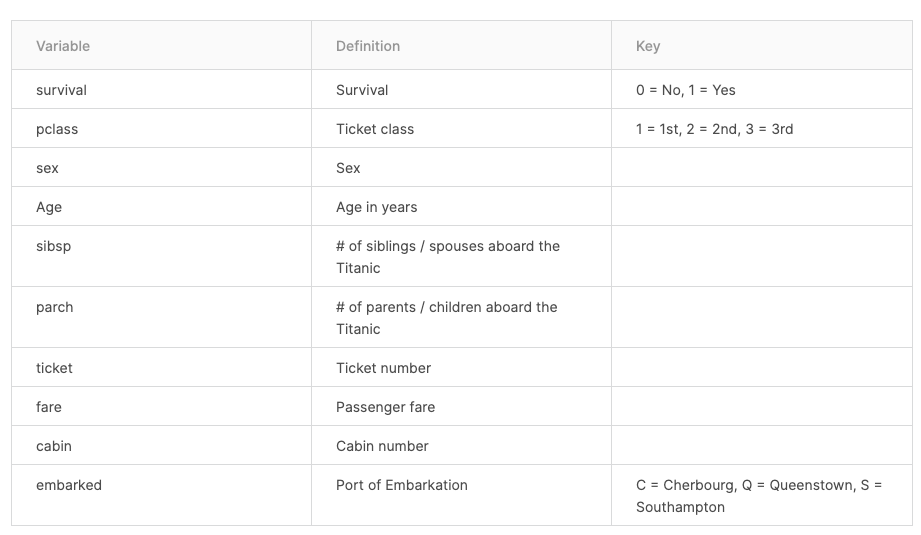

In [1]:
from PIL import Image
Image.open('images/data_dictionary.png')

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load the data
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")

In [4]:
#take a look at the train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#shape of the data
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

# Data Cleansing

 ['What should be the allowed percentage of Missing Values?'](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-p)

In [7]:
# check missing values
train_df.isnull().sum()

# there are four columns contains missing values - Age, Cabin, Embarked
# The percentage of missing values in the column of Age is  (177/891=0.198) less than 20%. 
# Age is missing in around 20% of cases, but we benefit by imputing them rather than ignoring the variable.

# Cabin is missing more than 77% of cases and cannot offer us useful information for our prediction.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# check missing values for test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# So I will simply remove this column from train and test data
train_df.drop(columns='Cabin',inplace=True)
test_df.drop(columns='Cabin',inplace=True)
# Besides the Cabin, the ticket number also cannot give us more useful information 
train_df.drop(columns='Ticket',inplace=True)
test_df.drop(columns='Ticket',inplace=True)

Text(0.5, 1.0, 'Distribution of Age - Test data')

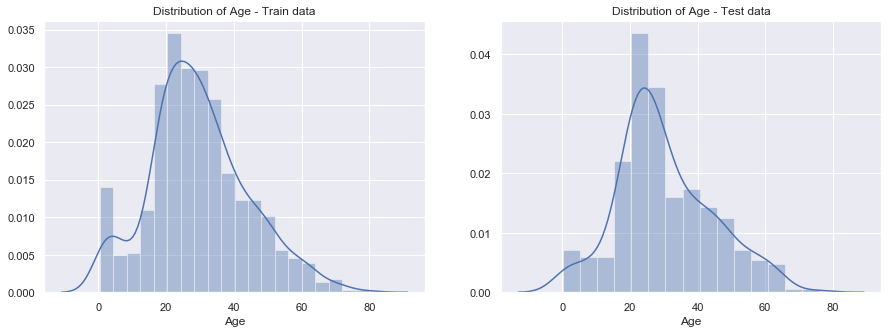

In [10]:
#
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_df.Age)
plt.title("Distribution of Age - Train data")
plt.subplot(1,2,2)
sns.distplot(test_df.Age)
plt.title("Distribution of Age - Test data")

# If there is a dataset that have great outliers, I'll prefer median. However for both datasets (Age) there is no any 
# significant outliers. So I'll fill missings with mean value.
# For more information please visit :https://en.wikipedia.org/wiki/Imputation_(statistics)

In [11]:
# fill out the missing values with mean
#It is better fill out the data with mean

train_df.Age.fillna(train_df.Age.mean(), inplace=True)
test_df.Age.fillna(train_df.Age.mean(), inplace=True)
test_df.Fare.fillna(train_df.Fare.mean(), inplace=True)

In [12]:
# we can see there are 2 missing values and 1 missing value in train 
# I will just simply remove them
train_df.dropna(axis=0,inplace=True)

In [13]:
# let us check missing values again at test and train data  
train_df.isnull().sum() , test_df.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64)

In [14]:
# feature engieering
#  create a new column for gender dummy
train_df["Gender"]=[1 if i=="male" else 0 for i in train_df.Sex ]
test_df["Gender"]=[1 if i=="male" else 0 for i in test_df.Sex ]
# create a new column for Port of Embarkation
train_df["Embarkation"]=train_df["Embarked"].map({'C':0,"Q":1,"S":2})
test_df["Embarkation"]=test_df["Embarked"].map({'C':0,"Q":1,"S":2})

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2


In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Embarkation
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,2


In [17]:
test_df.shape

(418, 11)

# Distribution

In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Gender', 'Embarkation'],
      dtype='object')

In [19]:
# declare target and features
features=["Pclass","Age",'SibSp','Parch', 'Fare','Gender', 'Embarkation']
target=train_df.Survived

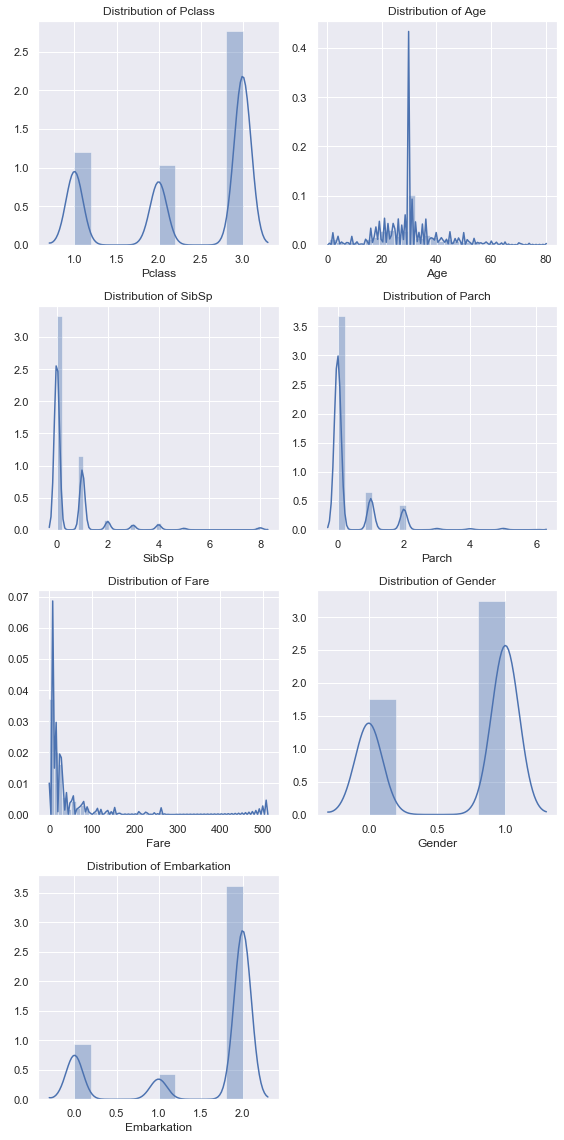

In [20]:
# distribution of features
plt.figure(figsize=(8,16))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.distplot(train_df[features[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}".format(features[i]))
plt.tight_layout()

# Pclasses
# There are 3 different Pclasses and most people are in the 3rd class  
# and the the numner of the people who are in the first and second class are simiar 

#Age
# based on the distribution of Age, we can observe that the mean of age is around 30
# and we can see there is a outlier located in left tail 
# which means some babies and kids

# Gender 
# We can see that most people are males and the data of females and males are not balanced.


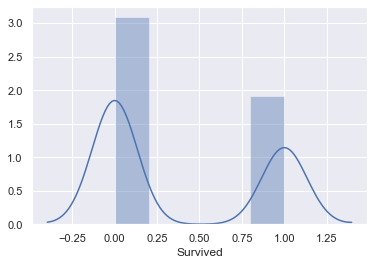

In [21]:
# target distribution
sns.distplot(target)
# we can see those two classes are not balanced
# I will use upsampling methods for the train data

# EDA

## features VS Target

In [22]:
# apart catogorical data and numerical data
cat=["Pclass","SibSp","Parch","Gender","Embarkation"] 
num=['Age','Fare']

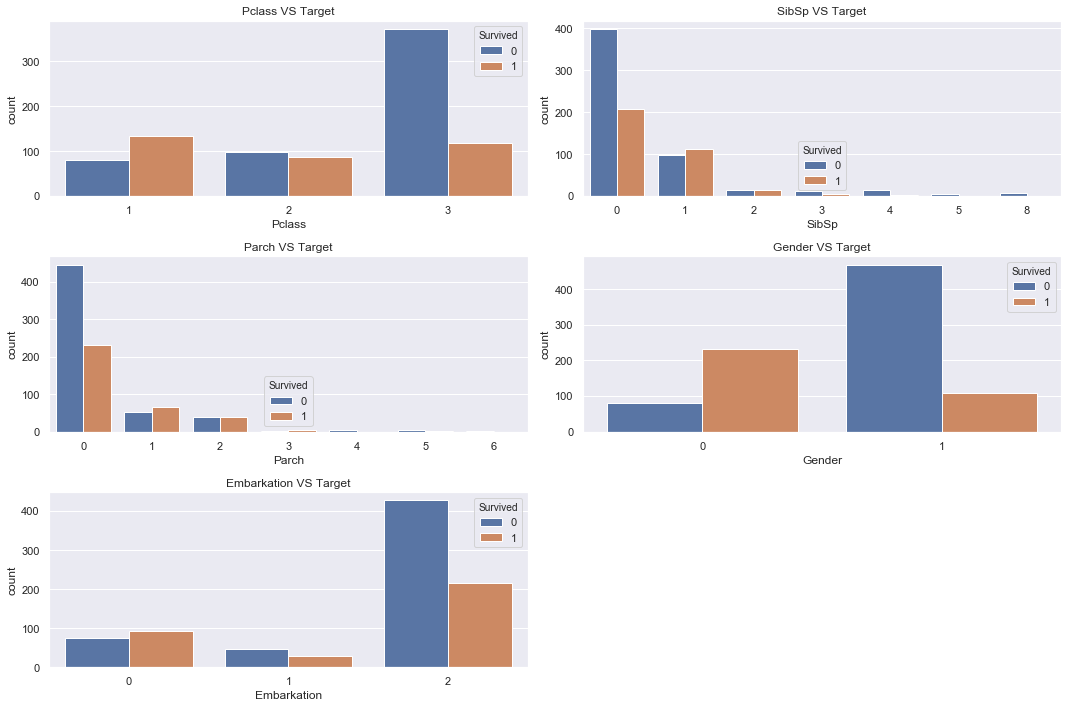

In [23]:
# catogorical data vs target
plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.subplot(3,2,i+1)
    sns.countplot(x=cat[i], hue ='Survived', data = train_df)
    plt.title("{} VS Target".format(cat[i]))
plt.tight_layout()
    


# Resampling

In [24]:
from sklearn.utils import resample

In [25]:

# concatenate our training data back together
training  = pd.DataFrame()
training[train_df[features].columns]=train_df[features]
training['target']=target
training.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarkation,target
0,3,22.0,1,0,7.2500,1,2,0
1,1,38.0,1,0,71.2833,0,0,1
2,3,26.0,0,0,7.9250,0,2,1
3,1,35.0,1,0,53.1000,0,2,1
4,3,35.0,0,0,8.0500,1,2,0


In [26]:
# separate minority and majority classes
zero= training[training.target==0]
one= training[training.target==1]

In [27]:
# Get a class count to understand the class imbalance.
print('zero count: '+ str(len(zero)))
print('one count: '+ str(len(one)))

zero count: 549
one count: 340


In [28]:
# upsample minority
one_upsampled = resample(one, # minority 
                          replace=True, # sample with replacement
                          n_samples=len(zero), # match number in majority class
                          random_state=23) # reproducible results
one_upsampled.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarkation,target
247,2,24.00,0,2,14.50,0,2,1
585,1,18.00,0,2,79.65,0,2,1
106,3,21.00,0,0,7.65,0,2,1
78,2,0.83,0,2,29.00,1,2,1
607,1,27.00,0,0,30.50,1,2,1


In [29]:

# combine majority and upsampled minority
upsampled= pd.concat([zero, one_upsampled])

# check new class counts
upsampled.target.value_counts()

1    549
0    549
Name: target, dtype: int64

# Standardization

In [30]:
# Normalize the Input Data and declare x_train, y_train ,x_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=pd.DataFrame(data=scaler.fit_transform(upsampled.drop('target', axis=1)),columns=upsampled.drop('target', axis=1).columns)
x_test=pd.DataFrame(data=scaler.fit_transform(test_df[features]),columns=test_df[features].columns)
y_train=upsampled.target

In [31]:
x_train.shape,y_train.shape

((1098, 7), (1098,))

In [32]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarkation
0,0.865870,-0.578896,0.502482,-0.494549,-0.501845,0.839624,0.597888
1,0.865870,0.431522,-0.463762,-0.494549,-0.485191,0.839624,0.597888
2,0.865870,0.019514,-0.463762,-0.494549,-0.476691,0.839624,-0.669450
3,-1.528903,1.908287,-0.463762,-0.494549,0.426875,0.839624,0.597888
4,0.865870,-2.133385,2.434969,0.777149,-0.214043,0.839624,0.597888


In [33]:
#Defining training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=360) 


In [34]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarkation
311,-1.528903,-0.889794,0.502482,-0.494549,1.614253,0.839624,-1.936787
145,0.865870,0.019514,-0.463762,-0.494549,-0.488401,0.839624,0.597888
1012,0.865870,0.019514,-0.463762,-0.494549,-0.488747,-1.191009,-0.669450
22,-0.331517,-0.190274,0.502482,-0.494549,-0.215605,-1.191009,0.597888
202,0.865870,2.452358,-0.463762,-0.494549,-0.522923,0.839624,0.597888


In [35]:
x_test.shape

(418, 7)

# Generating the Base First-Level Models


In [36]:
# Model Stacking method will be applied in this section

In [38]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

## Logistic Regression

In [39]:
#import library 
from sklearn.linear_model import LogisticRegression
# fit the model
log_re = LogisticRegression()
log_re.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Scores for Train data

In [40]:
#calculate scores for train data 
train_data_score = log_re.score(x_train, y_train)
print("Train data score:{}".format(train_data_score ))
# predict values for train data
log_y_train_pre=log_re.predict(x_train)
# calculate f1 scores for train data 
log_f1_score_train=f1_score(y_train,log_y_train_pre)
print("Train data f1 score:{}".format(log_f1_score_train))

Train data score:0.785876993166287
Train data f1 score:0.7808857808857809


### Scores for validation data


In [41]:
#calculate scores for validation data 
val_data_score = log_re.score(x_val, y_val)
print("Validation data score:{}".format(val_data_score ))
# predict values for validation data
log_y_val_pre=log_re.predict(x_val)
# calculate f1 scores for validation data 
log_f1_score_val=f1_score(y_val,log_y_val_pre)
print("Validation data f1 score:{}".format(log_f1_score_val))

Validation data score:0.8045454545454546
Validation data f1 score:0.7999999999999999


In [42]:
# obtain predicted values
y_test_pre0=log_re.predict(x_test)

## Random Forest

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# given prameters different values
random_grid={
             'n_estimators':list(range(1,50)),
             'max_features':list(range(1,5)),
             'max_depth':list(range(1,30)),
#             'min_samples_leaf':list(range(1,23)),
#               'min_samples_split':list(range(2,21))                
             }
# random forest model
rf=RandomForestClassifier(n_jobs=-1,  random_state=0)

In [46]:
# randommized searchCV
RS=RandomizedSearchCV(rf,random_grid,cv=10,scoring="f1")

In [47]:
# fit the train data
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [48]:
#obtian best parameters
RS.best_params_

{'n_estimators': 32, 'max_features': 3, 'max_depth': 26}

In [49]:
# best score
RS.best_score_

0.8741689137466275

In [50]:
# Random Forest model with best parameters
rfc=RandomForestClassifier(n_estimators=RS.best_params_["n_estimators"],
                           max_features=RS.best_params_["max_features"],
                           max_depth=RS.best_params_["max_depth"], 
#                            min_samples_split=RS.best_params_["min_samples_split"],
#                            min_samples_leaf=RS.best_params_["min_samples_leaf"],
                           n_jobs=-1, 
                           random_state=42)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=26, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###  Scores for Train data

In [51]:
rf_y_train_pre=rfc.predict(x_train)
print('Accuracy score of train data :{}'.format(rfc.score(x_train,y_train)))
print('Train data f1_Score:{}'.format(f1_score(y_train, rf_y_train_pre)))

Accuracy score of train data :0.9806378132118451
Train data f1_Score:0.9804372842347527


###  Scores for Validation data

In [52]:
rf_y_val_pre=rfc.predict(x_val)
print('Accuracy score of validation  data :{}'.format(rfc.score(x_val,y_val)))
print('validation data f1_Score:{}'.format(f1_score(y_val, rf_y_val_pre)))

Accuracy score of validation  data :0.8636363636363636
validation data f1_Score:0.8717948717948718


In [53]:
# obtain predicted values
y_test_pre1=rfc.predict(x_test)

## Neural NetWork

In [54]:
# thanks to :https://realpython.com/python-keras-text-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


- [Tuning Neural Network](https://github.com/learn-co-curriculum/dsc-tuning-neural-networks-with-regularization-lab/tree/solution)
- [Binary Classification with Deep Learning](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)

In [55]:
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu', kernel_initializer='normal'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, 
                 epochs=96, validation_data = (x_val, y_val),verbose=0)

###  Scores for Train data

In [56]:
nn_y_train_pre = model.predict_classes(x_train)
nn_f1_score_train=f1_score(y_train,nn_y_train_pre)
print("Train data f1 score:{}".format(nn_f1_score_train))

Train data f1 score:0.8533969010727056


###  Scores for validation data

In [57]:
nn_val_pre = model.predict_classes(x_val)
nn_f1_score_val=f1_score(y_val,nn_val_pre)
print("Validation data f1 score:{}".format(nn_f1_score_val))

Validation data f1 score:0.7887323943661971


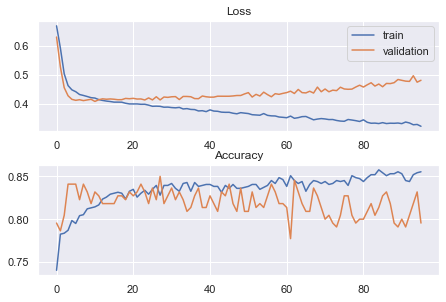

In [58]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.tight_layout(0)
plt.show()

In [61]:
# checkout the confusion_matrix
from sklearn.metrics import confusion_matrix

print("confusion_matrix:{}".format(confusion_matrix(y_val, nn_val_pre)))

confusion_matrix:[[91 16]
 [29 84]]


In [62]:
# obtain predicted values
y_test_pre2=model.predict_classes(x_test)

#  Model Stacking

## Data preparation

First-level output as new features
Having now obtained the first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [63]:
x_train_stack = pd.DataFrame( {
     'Logistic_Regression':log_y_train_pre.ravel(),
           'Random_Forest':rf_y_train_pre.ravel(),
          'Neural_Network':nn_y_train_pre.ravel()                                      
    })

x_train_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,1,0,0
1,0,0,0
2,1,1,1
3,1,0,1
4,0,0,0


In [64]:
x_val_stack = pd.DataFrame( {
    
     'Logistic_Regression':log_y_val_pre.ravel(),
           'Random_Forest':rf_y_val_pre.ravel(),
          'Neural_Network':nn_val_pre .ravel()  
                                        })

x_val_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,1,1,1
1,0,1,1
2,0,1,0
3,1,1,1
4,0,1,0


In [66]:

x_test_stack = pd.DataFrame( {
    
     'Logistic_Regression':y_test_pre0.ravel(),
           'Random_Forest':y_test_pre1.ravel(),
          'Neural_Network':y_test_pre2.ravel()  
                                        })

x_test_stack.head()

,Logistic_Regression,Random_Forest,Neural_Network
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,1,0


## XGboost

In [107]:
import xgboost as xgb
# given prameters different values
Random_Grid={
             'n_estimators':list(range(1,100)),
               'max_depth':list(range(1,30)),
            
             }

In [108]:
# xgboost  model
gbm = xgb.XGBClassifier(
                         n_jobs=-1,  
                         random_state=0)
# randommized searchCV
rs=RandomizedSearchCV(gbm,Random_Grid,cv=20,scoring="f1")

In [109]:
# fit the train data
rs.fit(x_train_stack,list(y_train))

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1,...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                    

In [110]:
# obtian best parameters best score
rs.best_score_,rs.best_params_

(0.9802677696665218, {'n_estimators': 23, 'max_depth': 16})

In [103]:
GBM = xgb.XGBClassifier(
                         n_estimators=rs.best_params_["n_estimators"],
                           max_features=rs.best_params_["max_features"],
                           max_depth=rs.best_params_["max_depth"], 
#                            min_samples_split=rs.best_params_["min_samples_split"],
#                            min_samples_leaf=rs.best_params_["min_samples_leaf"],
                        n_jobs=-1,  
                        random_state=0)
# fit the model 
GBM.fit(x_train_stack, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=14, max_features=1,
              min_child_weight=1, missing=None, n_estimators=62, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [104]:
#predictions
train_pre=GBM.predict(x_train_stack)
val_pre=GBM.predict(x_val_stack)
# obtian f1 score
f1_score_train=f1_score(list(y_train),train_pre)
f1_score_val=f1_score(list(y_val),val_pre)
# Score for train and test data 
print("F1 Score of train data :" , f1_score_train)
print("F1 Score of validation data :" ,f1_score_val)

F1 Score of train data : 0.9804372842347527
F1 Score of validation data : 0.8717948717948718


In [105]:
# prediction for test data 
y_test_pre=GBM.predict(x_test_stack)

In [106]:
# combine with our data
test_df["Survived"]=y_test_pre

In [86]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Embarkation,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,2,1


In [92]:
# submission
submission=test_df[['PassengerId','Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


In [90]:
submission.to_csv('submission.csv', index=False)